# WandB

In [ ]:
# !pip install wandb

In [ ]:
import wandb

wandb.login()
run = wandb.init(project=YOUR_PROJECT_NAME)

In [165]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Data preprocessing

### datetime features

In [166]:
df = pd.read_csv('p_train.csv')
display(df.head())

dates = df['date'].unique().tolist()

df['date'] = pd.to_datetime(df['date'])
df['doy'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

df['date'] = df['date'].dt.date.astype(str)

df = df[['date', 'y', 'doy', 'year', 'month', 'day', 'hour', 'weekday']]

display(df.head())

,date,hour,y
0,2013-01-02,0,97
1,2013-01-02,1,103
2,2013-01-02,2,102
3,2013-01-02,3,102
4,2013-01-02,4,61


,date,y,doy,year,month,day,hour,weekday
0,2013-01-02,97,2,2013,1,2,0,2
1,2013-01-02,103,2,2013,1,2,1,2
2,2013-01-02,102,2,2013,1,2,2,2
3,2013-01-02,102,2,2013,1,2,3,2
4,2013-01-02,61,2,2013,1,2,4,2


### hour -> daily

In [167]:
# hour -> daily
hour_data = []
for date in dates:
    data = df[df['date'] == date]['y'].to_list()
    hour_data.append(data)

hour_df = pd.DataFrame(data=hour_data, columns=[f'{i}H' for i in range(24)]) # train 24, test 15
hour_df

,0H,1H,2H,3H,4H,5H,6H,7H,8H,9H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,97,103,102,102,61,59,41,31,28,22,...,39,85,74,37,63,65,59,69,52,57
1,112,105,111,118,85,81,65,39,32,28,...,89,68,81,57,53,68,56,75,44,75
2,107,108,102,119,103,95,36,44,27,39,...,75,83,108,57,77,49,66,66,56,60
3,59,85,78,95,65,68,52,42,42,36,...,38,65,77,75,69,60,90,94,126,130
4,111,113,84,113,101,76,38,55,35,34,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,151,161,154,123,91,96,96,84,51,40,...,79,136,111,109,111,110,127,106,113,106
3463,122,120,120,120,81,93,92,82,80,53,...,131,124,116,158,161,111,98,121,103,107
3464,104,95,80,91,85,90,53,54,39,58,...,96,96,94,85,106,123,112,92,97,79
3465,105,143,142,164,112,79,73,66,46,30,...,64,103,120,103,85,102,88,100,52,74


### concat df(date) and hour_df

In [168]:
df = df.drop_duplicates('date', keep='first').reset_index(drop=True)
df = pd.concat([df, hour_df], axis='columns')
df

,date,y,doy,year,month,day,hour,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,2013-01-02,97,2,2013,1,2,0,2,97,103,...,39,85,74,37,63,65,59,69,52,57
1,2013-01-03,112,3,2013,1,3,0,3,112,105,...,89,68,81,57,53,68,56,75,44,75
2,2013-01-04,107,4,2013,1,4,0,4,107,108,...,75,83,108,57,77,49,66,66,56,60
3,2013-01-05,59,5,2013,1,5,0,5,59,85,...,38,65,77,75,69,60,90,94,126,130
4,2013-01-06,111,6,2013,1,6,0,6,111,113,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,2022-06-26,151,177,2022,6,26,0,6,151,161,...,79,136,111,109,111,110,127,106,113,106
3463,2022-06-27,122,178,2022,6,27,0,0,122,120,...,131,124,116,158,161,111,98,121,103,107
3464,2022-06-28,104,179,2022,6,28,0,1,104,95,...,96,96,94,85,106,123,112,92,97,79
3465,2022-06-29,105,180,2022,6,29,0,2,105,143,...,64,103,120,103,85,102,88,100,52,74


In [169]:
X_columns = ['doy', 'year', 'day', 'hour', 'weekday'] + [f'{i}H' for i in range(15)]
y_columns = [f'{i}H' for i in range(15, 24)]

# # split
# from sklearn.model_selection import train_test_split
# train_dates, val_dates = train_test_split(dates, train_size=0.9, shuffle=False)

# select dates
begin_date, end_date = '2021-07-01', '2021-10-15'
train = df[(df['date'] < begin_date) | (df['date'] > end_date)]
val = df[(df['date'] >= begin_date) & (df['date'] <= end_date)]

display(train)
display(val)

X_train = train[X_columns].to_numpy()
y_train = train[y_columns].to_numpy()

X_val = val[X_columns].to_numpy()
y_val = val[y_columns].to_numpy()

,date,y,doy,year,month,day,hour,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,2013-01-02,97,2,2013,1,2,0,2,97,103,...,39,85,74,37,63,65,59,69,52,57
1,2013-01-03,112,3,2013,1,3,0,3,112,105,...,89,68,81,57,53,68,56,75,44,75
2,2013-01-04,107,4,2013,1,4,0,4,107,108,...,75,83,108,57,77,49,66,66,56,60
3,2013-01-05,59,5,2013,1,5,0,5,59,85,...,38,65,77,75,69,60,90,94,126,130
4,2013-01-06,111,6,2013,1,6,0,6,111,113,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,2022-06-26,151,177,2022,6,26,0,6,151,161,...,79,136,111,109,111,110,127,106,113,106
3463,2022-06-27,122,178,2022,6,27,0,0,122,120,...,131,124,116,158,161,111,98,121,103,107
3464,2022-06-28,104,179,2022,6,28,0,1,104,95,...,96,96,94,85,106,123,112,92,97,79
3465,2022-06-29,105,180,2022,6,29,0,2,105,143,...,64,103,120,103,85,102,88,100,52,74


,date,y,doy,year,month,day,hour,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
3102,2021-07-01,112,182,2021,7,1,0,3,112,116,...,79,99,75,79,75,102,104,128,115,108
3103,2021-07-02,118,183,2021,7,2,0,4,118,113,...,90,100,107,94,53,105,90,118,101,102
3104,2021-07-03,112,184,2021,7,3,0,5,112,110,...,55,67,99,80,89,93,89,103,124,106
3105,2021-07-04,114,185,2021,7,4,0,6,114,105,...,79,116,161,139,153,133,144,145,138,132
3106,2021-07-05,90,186,2021,7,5,0,0,90,109,...,64,118,95,79,68,98,122,117,82,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,2021-10-11,152,284,2021,10,11,0,0,152,155,...,94,120,129,98,91,88,102,88,111,95
3205,2021-10-12,97,285,2021,10,12,0,1,97,81,...,59,109,114,103,87,98,127,108,82,98
3206,2021-10-13,111,286,2021,10,13,0,2,111,108,...,70,97,91,81,56,76,112,110,82,88
3207,2021-10-14,63,287,2021,10,14,0,3,63,94,...,67,100,94,101,87,97,125,93,103,129


In [ ]:
from xgboost.sklearn import XGBRegressor
from wandb.xgboost import WandbCallback

xgb_params = {
    'n_estimators': 100,
    'max_depth': 5,
    'random_state': 96
}
run.config.update(xgb_params)
run.config.update({'early_stopping_rounds': 10})
run.config.update({'note': 'first wandb test'})
run.config.update({'X_columns': X_columns})

model = XGBRegressor(
    **xgb_params,
    callbacks=[WandbCallback(log_model=True)]
)

eval_set = [(X_val, y_val)]

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
model.fit(X=X_train,
          y=y_train,
          eval_set=eval_set,
          eval_metric='mape',
          early_stopping_rounds=run.config['early_stopping_rounds'],
          verbose=True)
preds = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_val, preds)
mape = mean_absolute_percentage_error(y_val, preds)
print(mae, mape)
run.log({'MAE': mae, 'MAPE': mape})

In [172]:
test = pd.read_csv('pp_test.csv')

submission = pd.read_csv('sample_submission.csv')
test_preds = model.predict(test[X_columns])
submission['y'] = test_preds.reshape(-1)
submission.to_csv('submission.csv', index=False)

0 doy
1 year
2 day
3 hour
4 weekday
5 0H
6 1H
7 2H
8 3H
9 4H
10 5H
11 6H
12 7H
13 8H
14 9H
15 10H
16 11H
17 12H
18 13H
19 14H


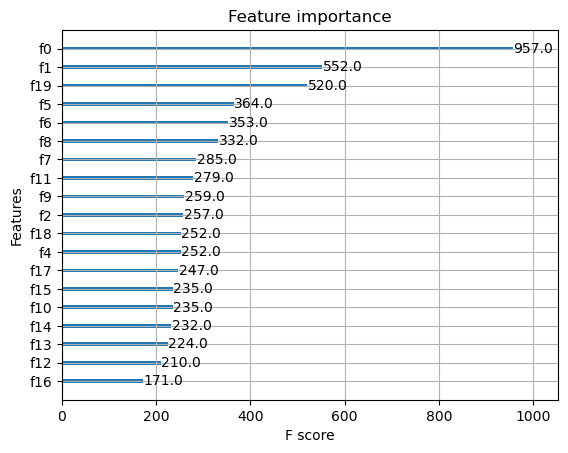

In [173]:
import xgboost
xgboost.plot_importance(model)

for i, col in enumerate(X_columns):
    print(i, col)